In [1]:
from os import listdir
import pandas as pd

In [2]:
# listando os arquivos com dados metereologicos de todas as estacoes
# fonte: https://bdmep.inmet.gov.br/#
arquivos_em = listdir('dados/metereologicos/')


In [3]:
dados_climaticos = pd.DataFrame()

for index, arquivo in enumerate(arquivos_em):   
    # criando uma string com o nome do número da estação metereologica
    estacao = arquivo[:11]; 
    
    # atribuindo a string a um nome de variável
    globals()[estacao] = pd.read_csv('dados/metereologicos/' + arquivo, sep=";", skiprows=10)
    
    # obtendo o nome da estacao na primeira linha do aquivo
    with open('dados/metereologicos/' + arquivo, 'r') as arquivo:
        for texto in arquivo.readlines():

            if (texto.startswith('Nome')):
                nome_estacao = texto[6:]

            if (texto.startswith('Codigo')):
                codigo_estacao = texto[16:]
                        
    # adicionando uma coluna com o nome da estacao    
    globals()[estacao].insert(1, 'DC_NOME', nome_estacao.replace('\n',''))
    globals()[estacao].insert(2, 'CD_ESTACAO', codigo_estacao.replace('\n',''))
    
    # consolidando todos os dados em um único dataframe
    dados_climaticos = pd.concat([dados_climaticos,globals()[estacao]])
    

    
    
    

In [4]:
# removendo colunas não utilizadas, e excluindo dados nulos
dados_climaticos.drop(['Unnamed: 1', 'Unnamed: 7'], axis=1, inplace=True)
dados_climaticos.dropna()



,Data Medicao,DC_NOME,CD_ESTACAO,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL(número)","PRECIPITACAO TOTAL, MENSAL(mm)","TEMPERATURA MAXIMA MEDIA, MENSAL(°C)","TEMPERATURA MEDIA COMPENSADA, MENSAL(°C)","TEMPERATURA MINIMA MEDIA, MENSAL(°C)","UMIDADE RELATIVA DO AR, MEDIA MENSAL(%)"
0,2008-01-31,ARACUAI,83442,9.0,47.4,33.887097,26.696129,21.664516,63.540323
1,2008-02-29,ARACUAI,83442,13.0,136.6,34.151724,26.688276,21.317241,67.051724
2,2008-03-31,ARACUAI,83442,11.0,84.7,33.070968,26.236129,21.322581,68.830645
3,2008-04-30,ARACUAI,83442,3.0,54.1,33.796667,26.230667,20.756667,67.333333
4,2008-05-31,ARACUAI,83442,0.0,0.0,31.554839,23.929677,17.745161,58.733871
...,...,...,...,...,...,...,...,...,...
175,2022-08-31,BELEM,82191,13.0,103.9,34.303226,27.372258,22.696774,79.685484
176,2022-09-30,BELEM,82191,16.0,152.3,34.546667,27.581333,23.043333,77.866667
177,2022-10-31,BELEM,82191,18.0,139.8,34.312903,27.720000,23.203226,78.927419
178,2022-11-30,BELEM,82191,19.0,359.2,33.300000,27.302000,23.653333,83.283333


In [5]:
# Obtendo informações sobre as estacoes metereologicas:
# https://portal.inmet.gov.br/

estacoes_convencionais = pd.read_csv('dados/estacoes/CatalogoEstacoesAutomaticas.csv', sep=";")
estacoes_automaticas = pd.read_csv('dados/estacoes/CatalogoEstacoesConvencionais.csv', sep=";")

In [6]:
# criando coluna para identificar o tipo da estacao
estacoes_convencionais['TIPO'] = 'convencional'
estacoes_automaticas['TIPO'] = 'automatica'

In [7]:
# unindo os dados de todas as estacoes em um único dataframe
estacoes = pd.concat([estacoes_automaticas, estacoes_convencionais])

In [8]:
# filtrando somente as estacoes operantes
estacoes_operantes = estacoes.query('CD_SITUACAO == "Operante"')

In [9]:
# filtrando somente as colunas necessárias
estacoes_operantes = estacoes_operantes[['DC_NOME', 'SG_ESTADO', 'CD_ESTACAO', 'TIPO']]

In [10]:
estacoes_operantes.head()

,DC_NOME,SG_ESTADO,CD_ESTACAO,TIPO
0,AGUA BRANCA,AL,82989,automatica
1,ALTAMIRA,PA,82353,automatica
2,ALTO DA BOA VISTA,RJ,83007,automatica
3,APODI,RN,82590,automatica
4,ARACUAI,MG,83442,automatica


In [11]:
dados_climaticos['CD_ESTACAO'] = dados_climaticos['CD_ESTACAO'].astype('int64')

In [12]:
# fazendo um merge entre as estacoes operantes e os dados metereologicos
dados_consolidados = estacoes_operantes.merge(dados_climaticos,  how='inner', on='CD_ESTACAO')

In [13]:
dados_consolidados.dropna(inplace=True)

In [14]:
dados_consolidados.drop('DC_NOME_y', axis=1, inplace=True)
dados_consolidados.rename(columns={"DC_NOME_x":"DC_NOME"}) 

,DC_NOME,SG_ESTADO,CD_ESTACAO,TIPO,Data Medicao,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL(número)","PRECIPITACAO TOTAL, MENSAL(mm)","TEMPERATURA MAXIMA MEDIA, MENSAL(°C)","TEMPERATURA MEDIA COMPENSADA, MENSAL(°C)","TEMPERATURA MINIMA MEDIA, MENSAL(°C)","UMIDADE RELATIVA DO AR, MEDIA MENSAL(%)"
0,AGUA BRANCA,AL,82989,automatica,2008-01-31,1.0,0.2,31.583871,24.574194,18.854839,73.806452
2,AGUA BRANCA,AL,82989,automatica,2008-03-31,14.0,192.0,28.935484,23.780000,19.261290,87.600000
3,AGUA BRANCA,AL,82989,automatica,2008-04-30,11.0,138.6,28.073333,23.429333,19.230000,90.766667
4,AGUA BRANCA,AL,82989,automatica,2008-05-31,22.0,142.4,25.670968,21.641290,18.348387,93.700000
5,AGUA BRANCA,AL,82989,automatica,2008-06-30,20.0,93.2,24.230000,20.217333,16.833333,93.900000
...,...,...,...,...,...,...,...,...,...,...,...
27355,ZE DOCA,MA,82376,automatica,2022-08-31,4.0,8.1,33.945161,28.003226,23.280645,70.403226
27356,ZE DOCA,MA,82376,automatica,2022-09-30,2.0,16.6,34.790000,28.394483,23.700000,67.333333
27357,ZE DOCA,MA,82376,automatica,2022-10-31,4.0,49.3,35.373077,28.800000,23.996154,71.038462
27358,ZE DOCA,MA,82376,automatica,2022-11-30,11.0,147.1,33.826923,27.892800,23.750000,79.115385


In [15]:
dados_consolidados.columns

Index(['DC_NOME_x', 'SG_ESTADO', 'CD_ESTACAO', 'TIPO', 'Data Medicao',
       'NUMERO DE DIAS COM PRECIP. PLUV, MENSAL(número)',
       'PRECIPITACAO TOTAL, MENSAL(mm)',
       'TEMPERATURA MAXIMA MEDIA, MENSAL(°C)',
       'TEMPERATURA MEDIA COMPENSADA, MENSAL(°C)',
       'TEMPERATURA MINIMA MEDIA, MENSAL(°C)',
       'UMIDADE RELATIVA DO AR, MEDIA MENSAL(%)'],
      dtype='object')

In [16]:
dados_consolidados.columns = ['NM_ESTACAO', 'SG_UF_ESTADO', 'CD_ESTACAO', 'TP_ESTACAO', 'DT_MEDICAO',
       'NUMERO_DIAS_COM_PRECIP_PLUV',
       'PRECIPITACAO_TOTAL_EM_MILIMETROS',
       'TEMPERATURA_MAXIMA_MEDIA',
       'TEMPERATURA_MEDIA_COMPENSADA',
       'TEMPERATURA_MINIMA_MEDIA',
       'UMIDADE_RELATIVA_DO_AR_MEDIA_MENSAL_PORCENTAGEM']

In [17]:
# dados_consolidados

,NM_ESTACAO,SG_UF_ESTADO,CD_ESTACAO,TP_ESTACAO,DT_MEDICAO,NUMERO_DIAS_COM_PRECIP_PLUV,PRECIPITACAO_TOTAL_EM_MILIMETROS,TEMPERATURA_MAXIMA_MEDIA,TEMPERATURA_MEDIA_COMPENSADA,TEMPERATURA_MINIMA_MEDIA,UMIDADE_RELATIVA_DO_AR_MEDIA_MENSAL_PORCENTAGEM
0,AGUA BRANCA,AL,82989,automatica,2008-01-31,1.0,0.2,31.583871,24.574194,18.854839,73.806452
2,AGUA BRANCA,AL,82989,automatica,2008-03-31,14.0,192.0,28.935484,23.780000,19.261290,87.600000
3,AGUA BRANCA,AL,82989,automatica,2008-04-30,11.0,138.6,28.073333,23.429333,19.230000,90.766667
4,AGUA BRANCA,AL,82989,automatica,2008-05-31,22.0,142.4,25.670968,21.641290,18.348387,93.700000
5,AGUA BRANCA,AL,82989,automatica,2008-06-30,20.0,93.2,24.230000,20.217333,16.833333,93.900000
...,...,...,...,...,...,...,...,...,...,...,...
27355,ZE DOCA,MA,82376,automatica,2022-08-31,4.0,8.1,33.945161,28.003226,23.280645,70.403226
27356,ZE DOCA,MA,82376,automatica,2022-09-30,2.0,16.6,34.790000,28.394483,23.700000,67.333333
27357,ZE DOCA,MA,82376,automatica,2022-10-31,4.0,49.3,35.373077,28.800000,23.996154,71.038462
27358,ZE DOCA,MA,82376,automatica,2022-11-30,11.0,147.1,33.826923,27.892800,23.750000,79.115385


# Analisando os Dados Consolidados

In [18]:
dados_consolidados.describe()

,NUMERO_DIAS_COM_PRECIP_PLUV,PRECIPITACAO_TOTAL_EM_MILIMETROS,TEMPERATURA_MAXIMA_MEDIA,TEMPERATURA_MEDIA_COMPENSADA,TEMPERATURA_MINIMA_MEDIA,UMIDADE_RELATIVA_DO_AR_MEDIA_MENSAL_PORCENTAGEM
count,12982.000000,12982.000000,12982.000000,12982.000000,12982.000000,12982.000000
mean,11.003697,131.561685,30.801293,24.707268,20.106909,73.810630
std,7.446990,128.950336,3.734011,3.619299,3.824088,11.989942
min,0.000000,0.000000,14.461290,8.410323,3.819355,0.000000
25%,5.000000,25.200000,28.887904,22.858226,18.191076,67.766264
50%,10.000000,93.900000,31.436667,25.777376,21.068518,76.354839
75%,17.000000,204.500000,33.225806,27.173772,23.012153,82.587366
max,31.000000,934.700000,40.013333,32.632258,26.980769,97.966667


In [19]:
dados_consolidados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12982 entries, 0 to 27359
Data columns (total 11 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NM_ESTACAO                                       12982 non-null  object 
 1   SG_UF_ESTADO                                     12982 non-null  object 
 2   CD_ESTACAO                                       12982 non-null  object 
 3   TP_ESTACAO                                       12982 non-null  object 
 4   DT_MEDICAO                                       12982 non-null  object 
 5   NUMERO_DIAS_COM_PRECIP_PLUV                      12982 non-null  float64
 6   PRECIPITACAO_TOTAL_EM_MILIMETROS                 12982 non-null  float64
 7   TEMPERATURA_MAXIMA_MEDIA                         12982 non-null  float64
 8   TEMPERATURA_MEDIA_COMPENSADA                     12982 non-null  float64
 9   TEMPERATURA_MINIMA_MEDIA    

In [20]:
# Converter a coluna DT_MEDICAO para tipo date
dados_consolidados['DT_MEDICAO'] = dados_consolidados['DT_MEDICAO'].astype('datetime64')

In [21]:
# Criando a coluna ANO
dados_consolidados['ANO'] = dados_consolidados['DT_MEDICAO'].dt.year

In [109]:
# criando a coluna REGIAO

ufs_regiao = """Unidade federativa	Sigla	Região
Acre	AC	Região Norte
Alagoas	AL	Região Nordeste
Amapá	AP	Região Norte
Amazonas	AM	Região Norte
Bahia	BA	Região Nordeste
Ceará	CE	Região Nordeste
Distrito Federal	DF	Região Centro-Oeste
Espírito Santo	ES	Região Sudeste
Goiás	GO	Região Centro-Oeste
Maranhão	MA	Região Nordeste
Mato Grosso	MT	Região Centro-Oeste
Mato Grosso do Sul	MS	Região Centro-Oeste
Minas Gerais	MG	Região Sudeste
Pará	PA	Região Norte
Paraíba	PB	Região Nordeste
Paraná	PR	Região Sul
Pernambuco	PE	Região Nordeste
Piauí	PI	Região Nordeste
Rio de Janeiro	RJ	Região Sudeste
Rio Grande do Norte	RN	Região Nordeste
Rio Grande do Sul	RS	Região Sul
Rondônia	RO	Região Norte
Roraima	RR	Região Norte
Santa Catarina	SC	Região Sul
São Paulo	SP	Região Sudeste
Sergipe	SE	Região Nordeste
Tocantins	TO	Região Norte"""


In [124]:
ufs = [regioes['Sigla']]
regiao = [regioes['Região']]
print(regiao)

[0            Região Norte
1         Região Nordeste
2            Região Norte
3            Região Norte
4         Região Nordeste
5         Região Nordeste
6     Região Centro-Oeste
7          Região Sudeste
8     Região Centro-Oeste
9         Região Nordeste
10    Região Centro-Oeste
11    Região Centro-Oeste
12         Região Sudeste
13           Região Norte
14        Região Nordeste
15             Região Sul
16        Região Nordeste
17        Região Nordeste
18         Região Sudeste
19        Região Nordeste
20             Região Sul
21           Região Norte
22           Região Norte
23             Região Sul
24         Região Sudeste
25        Região Nordeste
26           Região Norte
Name: Região, dtype: object]


In [142]:
from io import StringIO

regioes_io = StringIO(ufs_regiao)
regioes = pd.read_csv(regioes_io, sep="\t")
ufs = list([regioes['Sigla']])
regiao = list([regioes['Região']])
dict_regiao = {}

for i in range(27):
    uf = ufs[0][i]
    reg = regiao[0][i]

    dict_regiao[uf] = reg



In [153]:
dados_consolidados['REGIAO'] = dados_consolidados['SG_UF_ESTADO'].map(dict_regiao)

In [168]:
dados_agrupados_por_estados = dados_consolidados.groupby(['SG_UF_ESTADO','ANO']).mean().reset_index()
dados_agrupados_por_regiao = dados_consolidados.groupby(['SG_UF_ESTADO','REGIAO', 'ANO']).mean().reset_index()

In [156]:
dados_agrupados_por_regiao.head()

,REGIAO,ANO,NUMERO_DIAS_COM_PRECIP_PLUV,PRECIPITACAO_TOTAL_EM_MILIMETROS,TEMPERATURA_MAXIMA_MEDIA,TEMPERATURA_MEDIA_COMPENSADA,TEMPERATURA_MINIMA_MEDIA,UMIDADE_RELATIVA_DO_AR_MEDIA_MENSAL_PORCENTAGEM
0,Região Centro-Oeste,2008,10.895028,138.837569,30.898219,23.845139,18.684020,68.301370
1,Região Centro-Oeste,2009,11.582474,144.737629,30.874421,24.032215,19.182825,71.761804
2,Região Centro-Oeste,2010,9.169154,120.516418,31.662818,24.292122,18.850538,65.513591
3,Região Centro-Oeste,2011,10.552083,136.437500,30.892054,23.893475,18.705080,68.259574
4,Região Centro-Oeste,2012,10.167513,122.790355,31.260474,24.222092,19.040623,67.502865


In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

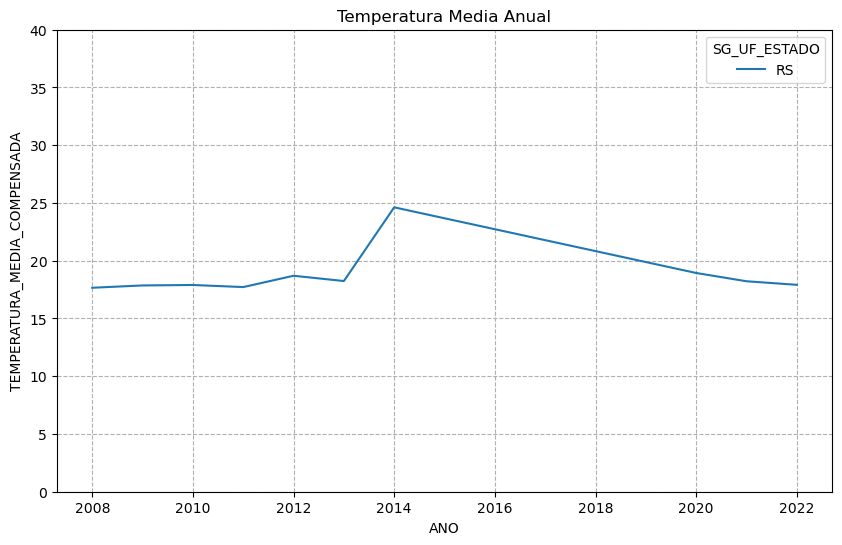

In [232]:
# estados = list(dados_consolidados['SG_UF_ESTADO'].unique())

lista_estados = ['RS']
dados = dados_agrupados_por_estados.query('SG_UF_ESTADO == @lista_estados')[['ANO','TEMPERATURA_MEDIA_COMPENSADA','SG_UF_ESTADO']]
plt.figure(figsize=(10,6))
plt.ylim(0,40)
plt.grid(linestyle="--")
plt.title('Temperatura Media Anual')
sns.lineplot(data=dados, x = 'ANO', y = 'TEMPERATURA_MEDIA_COMPENSADA', hue = 'SG_UF_ESTADO')
plt.show()


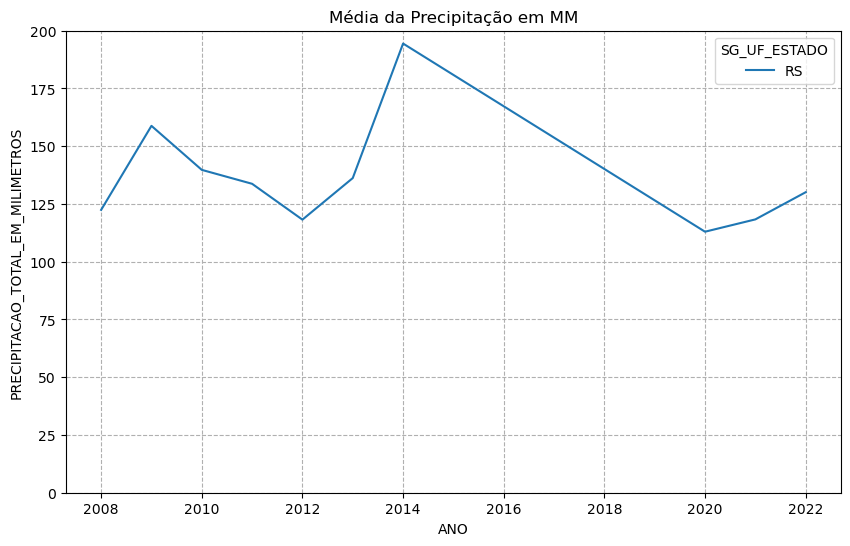

In [225]:
# estados = list(dados_consolidados['SG_UF_ESTADO'].unique())
lista_estados = ['RS']
dados = dados_agrupados_por_estados.query('SG_UF_ESTADO == @lista_estados')[['ANO','PRECIPITACAO_TOTAL_EM_MILIMETROS','SG_UF_ESTADO']]
plt.figure(figsize=(10,6))
plt.ylim(0,200)
plt.grid(linestyle="--")
plt.title('Média da Precipitação em MM')
sns.lineplot(data=dados, x = 'ANO', y = 'PRECIPITACAO_TOTAL_EM_MILIMETROS', hue = 'SG_UF_ESTADO')
plt.show()

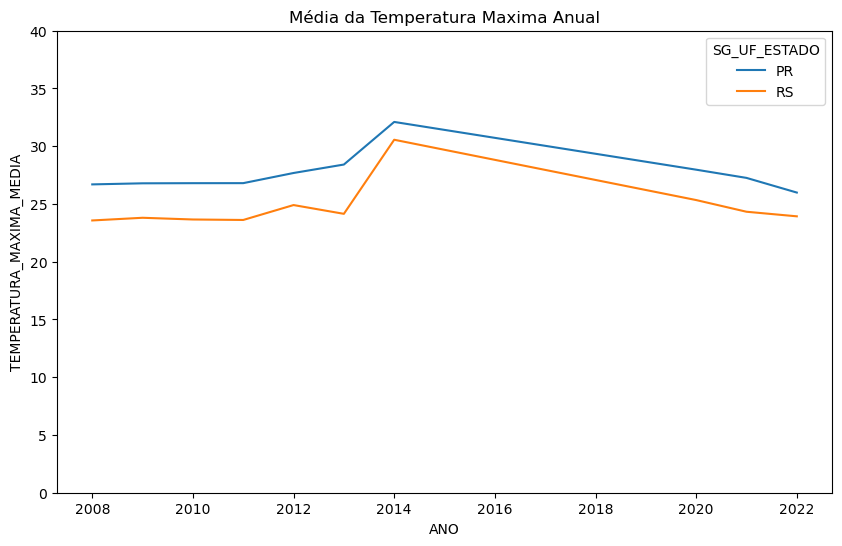

In [234]:
lista_regioes = ['Região Sul']
dados = dados_agrupados_por_regiao.query('REGIAO == @lista_regioes')[['ANO','TEMPERATURA_MAXIMA_MEDIA','SG_UF_ESTADO']]
plt.figure(figsize=(10,6))
plt.ylim(0,40)
plt.title('Média da Temperatura Maxima Anual')
sns.lineplot(data=dados, x = 'ANO', y = 'TEMPERATURA_MAXIMA_MEDIA', hue = 'SG_UF_ESTADO')
plt.show()

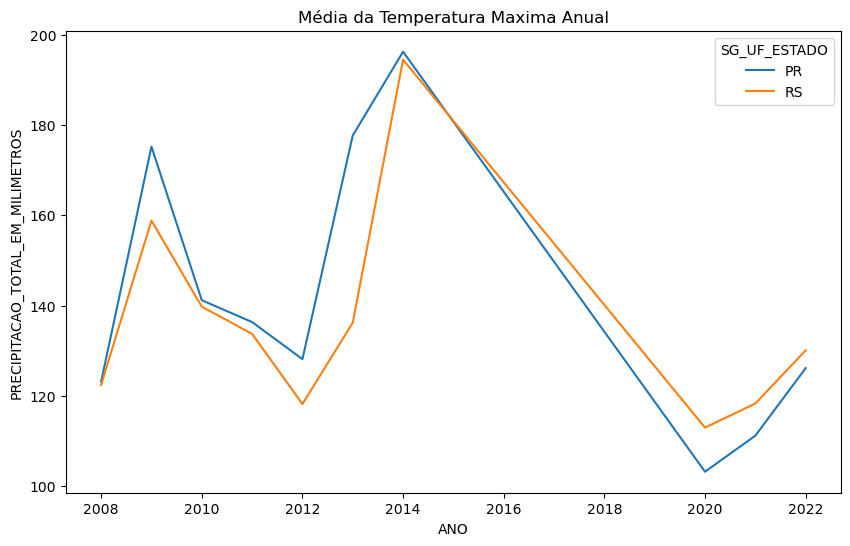

In [233]:
lista_regioes = ['Região Sul']
dados = dados_agrupados_por_regiao.query('REGIAO == @lista_regioes')[['ANO','PRECIPITACAO_TOTAL_EM_MILIMETROS','SG_UF_ESTADO']]
plt.figure(figsize=(10,6))
# plt.ylim(0,40)
plt.title('Média da Temperatura Maxima Anual')
sns.lineplot(data=dados, x = 'ANO', y = 'PRECIPITACAO_TOTAL_EM_MILIMETROS', hue = 'SG_UF_ESTADO')
plt.show()

# Produção de Vinhos

In [218]:
dados_producao = pd.read_excel('dados/data.xlsx', skipfooter=2)

/home/marco/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [222]:
# Retirando a coluna Continent
# dados.drop('Continent', axis=1, inplace=True)
dados_producao = dados_producao.rename(columns={'Region/Country':'Country'})
dados_producao
producao = dados.query('Variable == "Production"')
exportacao = dados.query('Variable == "Exports"')

## Quebra Histórica na Produção de Vinho em 2016

https://agenciabrasil.ebc.com.br/economia/noticia/2016-04/quebra-de-57-na-safra-da-uva-e-maior-ja-registrada-no-rio-grande-do-sul

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


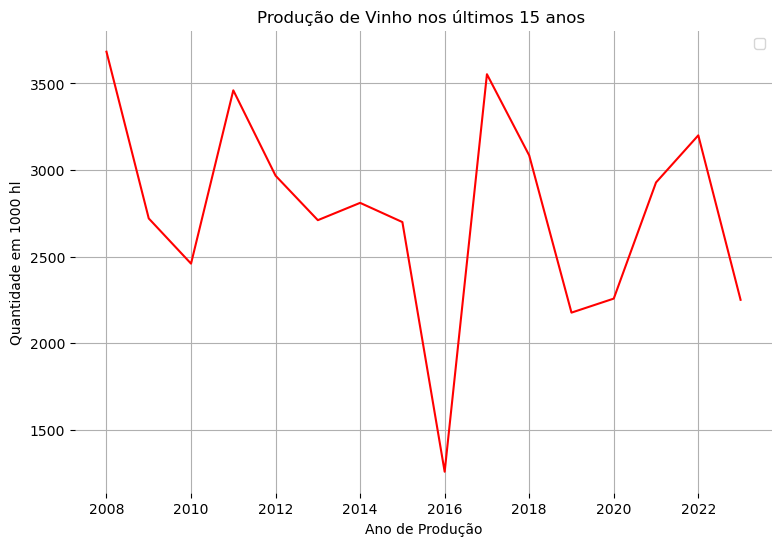

In [229]:
plt.figure(figsize=(9,6))
sns.lineplot(data=producao.query('Country == "Brazil"'), x = 'Year', y = 'Quantity', color="red")
plt.legend()
plt.xlabel('Ano de Produção')
plt.ylabel('Quantidade em 1000 hl')
plt.title("Produção de Vinho nos últimos 15 anos ")
plt.grid()
plt.box(False)
plt.show()



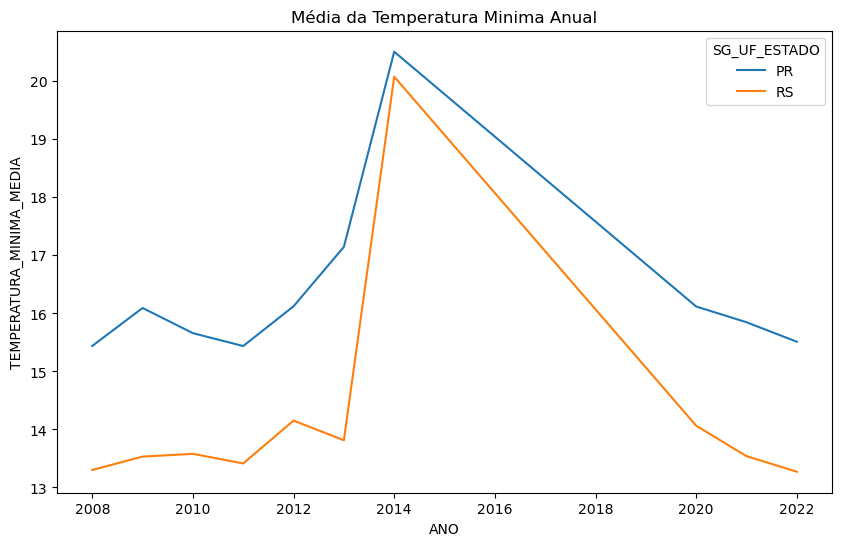

In [230]:
lista_regioes = ['Região Sul']
dados = dados_agrupados_por_regiao.query('REGIAO == @lista_regioes')[['ANO','TEMPERATURA_MINIMA_MEDIA','SG_UF_ESTADO']]
plt.figure(figsize=(10,6))
# plt.ylim(0,40)
plt.title('Média da Temperatura Minima Anual')
sns.lineplot(data=dados, x = 'ANO', y = 'TEMPERATURA_MINIMA_MEDIA', hue = 'SG_UF_ESTADO')
plt.show()

In [242]:
dados_producao_brasil = dados_producao.query('Country == "Brazil" and Variable == "Production"') 

In [246]:
dados_climaticos_brasil = dados_agrupados_por_estados.query('SG_UF_ESTADO == "RS"')

In [268]:
dados_producao_clima = dados_producao_brasil.merge(dados_climaticos_brasil, left_on='Year', right_on='ANO')

In [279]:
dados_producao_clima.corr()

,Year,Quantity,ANO,NUMERO_DIAS_COM_PRECIP_PLUV,PRECIPITACAO_TOTAL_EM_MILIMETROS,TEMPERATURA_MAXIMA_MEDIA,TEMPERATURA_MEDIA_COMPENSADA,TEMPERATURA_MINIMA_MEDIA,UMIDADE_RELATIVA_DO_AR_MEDIA_MENSAL_PORCENTAGEM
Year,1.000000,-0.243381,1.000000,-0.125871,-0.278209,0.141513,0.090876,0.012474,-0.464104
Quantity,-0.243381,1.000000,-0.243381,0.216798,-0.123021,-0.235538,-0.210092,-0.177713,0.318404
ANO,1.000000,-0.243381,1.000000,-0.125871,-0.278209,0.141513,0.090876,0.012474,-0.464104
NUMERO_DIAS_COM_PRECIP_PLUV,-0.125871,0.216798,-0.125871,1.000000,-0.648773,-0.985455,-0.979758,-0.967873,0.206738
PRECIPITACAO_TOTAL_EM_MILIMETROS,-0.278209,-0.123021,-0.278209,-0.648773,1.000000,0.709772,0.756940,0.798922,0.484661
TEMPERATURA_MAXIMA_MEDIA,0.141513,-0.235538,0.141513,-0.985455,0.709772,1.000000,0.996172,0.985335,-0.177128
TEMPERATURA_MEDIA_COMPENSADA,0.090876,-0.210092,0.090876,-0.979758,0.756940,0.996172,1.000000,0.995985,-0.099501
TEMPERATURA_MINIMA_MEDIA,0.012474,-0.177713,0.012474,-0.967873,0.798922,0.985335,0.995985,1.000000,-0.030276
UMIDADE_RELATIVA_DO_AR_MEDIA_MENSAL_PORCENTAGEM,-0.464104,0.318404,-0.464104,0.206738,0.484661,-0.177128,-0.099501,-0.030276,1.000000


<AxesSubplot:>

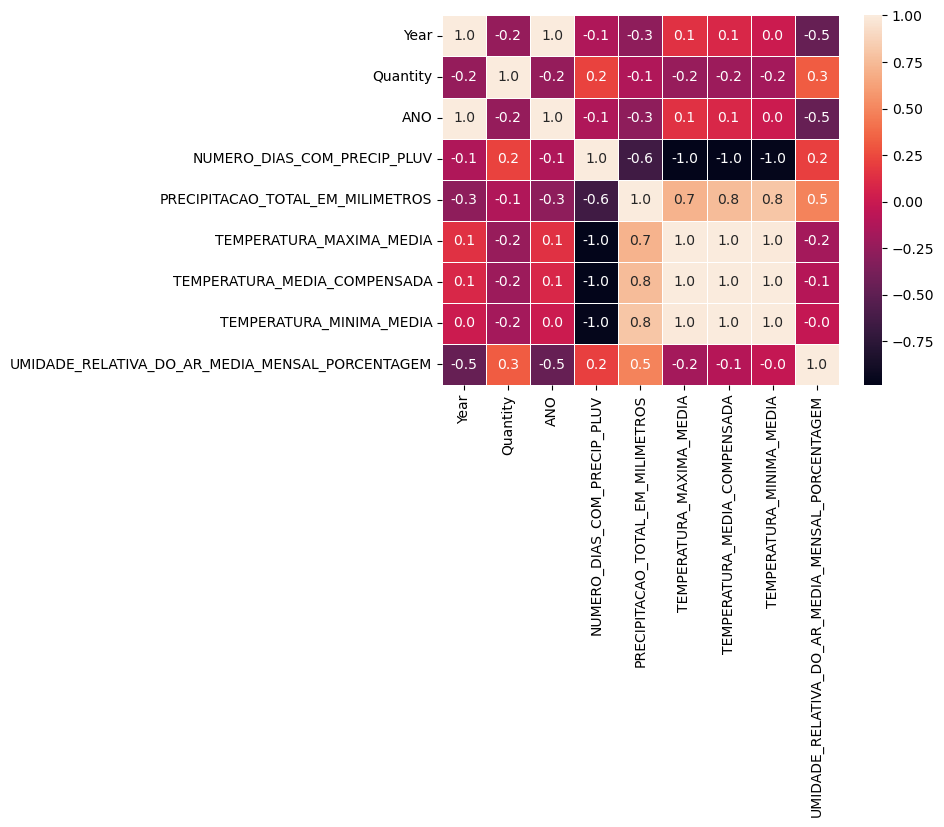

In [272]:
correlacao = dados_producao_clima.corr()
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)
plot